<a href="https://colab.research.google.com/github/mrdbourke/pytorch-deep-learning/blob/main/extras/exercises/01_pytorch_workflow_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 01. PyTorch Workflow Exercise Template

The following is a template for the PyTorch workflow exercises.

It's only starter code and it's your job to fill in the blanks.

Because of the flexibility of PyTorch, there may be more than one way to answer the question.

Don't worry about trying to be *right* just try writing code that suffices the question.

You can see one form of [solutions on GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions) (but try the exercises below yourself first!).

In [2]:
# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

import torch
import torch.nn as nn
import torch.optim as optim

import warnings
warnings.simplefilter('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [3]:
# Setup device-agnostic code

if torch.cuda.is_available():
    device = "cuda" # Use NVIDIA GPU (if available)
elif torch.backends.mps.is_available():
    device = "mps" # Use Apple Silicon GPU (if available)
else:
    device = "cpu" # Default to CPU if no GPU is available
    
print(device)

mps


## 1. Create a straight line dataset using the linear regression formula (`weight * X + bias`).
  * Set `weight=0.3` and `bias=0.9` there should be at least 100 datapoints total. 
  * Split the data into 80% training, 20% testing.
  * Plot the training and testing data so it becomes visual.

Your output of the below cell should look something like:
```
Number of X samples: 100
Number of y samples: 100
First 10 X & y samples:
X: tensor([0.0000, 0.0100, 0.0200, 0.0300, 0.0400, 0.0500, 0.0600, 0.0700, 0.0800,
        0.0900])
y: tensor([0.9000, 0.9030, 0.9060, 0.9090, 0.9120, 0.9150, 0.9180, 0.9210, 0.9240,
        0.9270])
```

Of course the numbers in `X` and `y` may be different but ideally they're created using the linear regression formula.

In [14]:
# Create the data parameters

# # Set constants
# weight = 0.3
# bias = 0.9
# num_samples = 100

# # Create X values (evenly spaced between 0 and 1)
# X = torch.linspace(0.01, 1, num_samples)

# # Make X and y using linear regression feature
# y = weight * X + bias

# print(f"Number of X samples: {len(X)}")
# print(f"Number of y samples: {len(y)}")
# print(f"First 10 X & y samples:\nX: {X[:10]}\ny: {y[:10]}")

In [35]:
# Set constants
weight = 0.3
bias = 0.9
# num_samples = 100

# Create X values (evenly spaced between 0 and 1)
X = torch.linspace(0.01, 1, num_samples).unsqueeze(dim=1) # DONT FORGET TO ADD 1 DIM to X!! {unsqueeze!}

# Make X and y using linear regression feature
y = weight * X + bias

print(f"Number of X samples: {len(X)}")
print(f"Number of y samples: {len(y)}")
print(f"First 10 X & y samples:\nX: {X[:10]}\ny: {y[:10]}")

Number of X samples: 100
Number of y samples: 100
First 10 X & y samples:
X: tensor([[0.0100],
        [0.0200],
        [0.0300],
        [0.0400],
        [0.0500],
        [0.0600],
        [0.0700],
        [0.0800],
        [0.0900],
        [0.1000]])
y: tensor([[0.9030],
        [0.9060],
        [0.9090],
        [0.9120],
        [0.9150],
        [0.9180],
        [0.9210],
        [0.9240],
        [0.9270],
        [0.9300]])


In [36]:
# Split the data into training and testing

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42) # ONLY using 42 bc the Instr. does & I want to mirror his results!

X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([80, 1]),
 torch.Size([20, 1]),
 torch.Size([80, 1]),
 torch.Size([20, 1]))

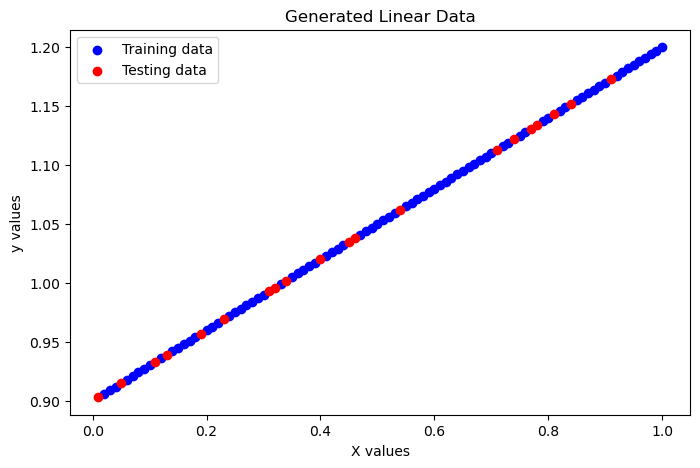

In [37]:
# Plot the training and testing data 

plt.figure(figsize=(8, 5))
plt.scatter(X_train, y_train, c="blue", label="Training data")
plt.scatter(X_test, y_test, c="red", label="Testing data")
plt.title("Generated Linear Data")
plt.xlabel("X values")
plt.ylabel("y values")
plt.legend()
plt.show();

## 2. Build a PyTorch model by subclassing `nn.Module`. 
  * Inside should be a randomly initialized `nn.Parameter()` with `requires_grad=True`, one for `weights` and one for `bias`. 
  * Implement the `forward()` method to compute the linear regression function you used to create the dataset in 1. 
  * Once you've constructed the model, make an instance of it and check its `state_dict()`.
  * **Note:** If you'd like to use `nn.Linear()` instead of `nn.Parameter()` you can.

In [21]:
# Create PyTorch linear regression model by subclassing nn.Module

# OPTION 1: Manually code in self.weights & self.bias

# class LinearRegression_v0(nn.Module):
#     def __init__(self):
#         super().__init__()
        
#         self.weights = nn.Parameter(
#             torch.randn(1, dtype=torch.float32)
#             , requires_grad=True
#         )
        
#         self.bias = nn.Parameter(
#             torch.randn(1, dtype=torch.float32)
#             , requires_grad=True
#         )
        
#     def forward(self, x: torch.Tensor) -> torch.Tensor:
#         return self.weights * x * self.bias

In [22]:
# Instantiate the model and put it to the target device

torch.manual_seed(42)

model_0 = LinearRegression_v0()
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [38]:
# OPTION 2: use nn.Linear w/ in_features/out_features (seems more straightforward... why not?)

# Create PyTorch linear regression model by subclassing nn.Module

class LinearRegression_v2(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_layer = nn.Linear(
            in_features=1
            , out_features=1
        )
        
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)

In [39]:
torch.manual_seed(42)

model_2 = LinearRegression_v2()
list(model_2.parameters())

[Parameter containing:
 tensor([[0.7645]], requires_grad=True),
 Parameter containing:
 tensor([0.8300], requires_grad=True)]

In [40]:
# Instantiate the model and put it to the target device 

model_2.to(device)
list(model_2.parameters())

[Parameter containing:
 tensor([[0.7645]], device='mps:0', requires_grad=True),
 Parameter containing:
 tensor([0.8300], device='mps:0', requires_grad=True)]

In [41]:
# model_0.state_dict()

model_2.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]], device='mps:0')),
             ('linear_layer.bias', tensor([0.8300], device='mps:0'))])

In [42]:
# next(model_0.parameters()).device
next(model_2.parameters()).device

device(type='mps', index=0)

## 3. Create a loss function and optimizer using `nn.L1Loss()` and `torch.optim.SGD(params, lr)` respectively. 
  * Set the learning rate of the optimizer to be 0.01 and the parameters to optimize should be the model parameters from the model you created in 2.
  * Write a training loop to perform the appropriate training steps for 300 epochs.
  * The training loop should test the model on the test dataset every 20 epochs.

In [43]:
# Create the loss function and optimizer

loss_fn = nn.L1Loss()

optimizer = optim.SGD(params=model_2.parameters()
                      , lr=0.01
                     )

In [44]:
# Temporarily suppress duplicate outputs (if you dont do this, the training loop will print EVERY epoch :/)
InteractiveShell.ast_node_interactivity = 'last_expr'

In [45]:
# Training loop

# Set the manual seed AND epochs (for range;)
torch.manual_seed(42)
epochs = 300

# Set up the empties:
train_loss_values = []
test_loss_values = []
epoch_count = []


# Send data to target device (GOTTA REMEMBER THIS STEP!!! {whys it not in tha song?!?!?!})

X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

# Train model for 300 epochs

for epoch in range(epochs):

### TRAINING

    # 0. Put model in train mode
    model_2.train()
    
    # 1. Forward pass
    y_pred = model_2(X_train)
    
    # 2. Calculate loss
    loss = loss_fn(y_pred, y_train) # Remember: w/ PyTorch, y_pred comes first in the params;
    
    # 3. optimizer zero_grad!
    optimizer.zero_grad()
    
    # 4. Backpropagation (loss.backward!)
    loss.backward()
    
    # 5. optimizer step, (step, step!)
    optimizer.step()
    

### TESTING  

    # 0. Put model in evaluation mode and setup inference context 
    model_2.eval()
    
    # 1. Forward pass
    test_pred = model_2(X_test)
    
    # 2. calculate the loss
    test_loss = loss_fn(test_pred, y_test.type(torch.float32))
    
    # 3. Perform testing every 20 epochs:
    if epoch % 20 == 0:
        
        # Print out what's happening
        print(f"Epoch: {epoch} | Train loss: {loss:.4f} | Test loss: {test_loss:.4f}")

Epoch: 0 | Train loss: 0.1792 | Test loss: 0.1490
Epoch: 20 | Train loss: 0.0983 | Test loss: 0.0924
Epoch: 40 | Train loss: 0.0800 | Test loss: 0.0846
Epoch: 60 | Train loss: 0.0701 | Test loss: 0.0760
Epoch: 80 | Train loss: 0.0607 | Test loss: 0.0660
Epoch: 100 | Train loss: 0.0512 | Test loss: 0.0557
Epoch: 120 | Train loss: 0.0418 | Test loss: 0.0454
Epoch: 140 | Train loss: 0.0324 | Test loss: 0.0351
Epoch: 160 | Train loss: 0.0230 | Test loss: 0.0247
Epoch: 180 | Train loss: 0.0136 | Test loss: 0.0144
Epoch: 200 | Train loss: 0.0042 | Test loss: 0.0041
Epoch: 220 | Train loss: 0.0045 | Test loss: 0.0075
Epoch: 240 | Train loss: 0.0045 | Test loss: 0.0075
Epoch: 260 | Train loss: 0.0045 | Test loss: 0.0075
Epoch: 280 | Train loss: 0.0045 | Test loss: 0.0075


## 4. Make predictions with the trained model on the test data.
  * Visualize these predictions against the original training and testing data (**note:** you may need to make sure the predictions are *not* on the GPU if you want to use non-CUDA-enabled libraries such as matplotlib to plot).

In [48]:
# Make predictions with the model

model_2.eval()

with torch.inference_mode():
    y_preds = model_2(X_test)
    
y_preds

tensor([[1.1488],
        [1.0576],
        [1.1093],
        [1.0332],
        [1.0302],
        [1.0150],
        [0.9632],
        [1.1397],
        [0.9267],
        [0.8963],
        [0.9511],
        [0.9876],
        [1.1184],
        [0.9967],
        [1.1701],
        [0.9085],
        [1.1275],
        [1.1306],
        [0.9328],
        [0.9906]], device='mps:0')

In [49]:
y_preds.cpu()

tensor([[1.1488],
        [1.0576],
        [1.1093],
        [1.0332],
        [1.0302],
        [1.0150],
        [0.9632],
        [1.1397],
        [0.9267],
        [0.8963],
        [0.9511],
        [0.9876],
        [1.1184],
        [0.9967],
        [1.1701],
        [0.9085],
        [1.1275],
        [1.1306],
        [0.9328],
        [0.9906]])

In [53]:
# Helper function to move tensors to CPU for plotting
def to_cpu(tensor: torch.Tensor) -> torch.Tensor:
    """Move a tensor to CPU if it's not already on CPU."""
    if tensor.device != torch.device("cpu"):
        return tensor.cpu()
    return tensor

# Plotting function
def plot_predictions(X_train, y_train, X_test, y_test, y_preds):
    """Plot the training data, testing data, and predictions."""
    # Move all tensors to CPU for plotting
    X_train, y_train = to_cpu(X_train), to_cpu(y_train)
    X_test, y_test = to_cpu(X_test), to_cpu(y_test)
    y_preds = to_cpu(y_preds)
    
    # Convert tensors to NumPy arrays
    X_train, y_train = X_train.numpy(), y_train.numpy()
    X_test, y_test = X_test.numpy(), y_test.numpy()
    y_preds = y_preds.detach().numpy()  # Detach from computation graph

    # Plotting
    plt.figure(figsize=(8, 5))
    plt.scatter(X_train, y_train, c="blue", label="Training data")
    plt.scatter(X_test, y_test, c="red", label="Testing data")
    plt.plot(X_test, y_preds, c="green", label="Predictions", linewidth=2)
    plt.title("Linear Regression Predictions")
    plt.xlabel("X values")
    plt.ylabel("y values")
    plt.legend()
    plt.show()

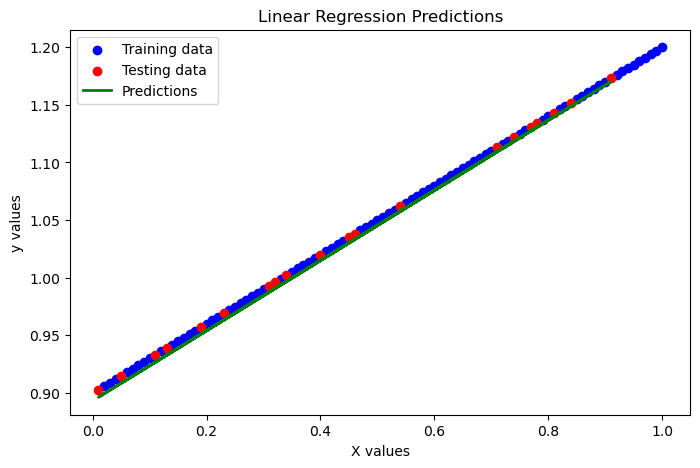

In [54]:
# After training the model, make predictions and plot
with torch.inference_mode():  # Use inference mode for evaluation
    y_preds = model_2(X_test)  # Predict on test data
    plot_predictions(X_train, y_train, X_test, y_test, y_preds);

## 5. Save your trained model's `state_dict()` to file.
  * Create a new instance of your model class you made in 2. and load in the `state_dict()` you just saved to it.
  * Perform predictions on your test data with the loaded model and confirm they match the original model predictions from 4.

In [ ]:
from pathlib import Path

# 1. Create models directory 


# 2. Create model save path 

# 3. Save the model state dict


In [ ]:
# Create new instance of model and load saved state dict (make sure to put it on the target device)


In [ ]:
# Make predictions with loaded model and compare them to the previous
